<a href="https://colab.research.google.com/github/jonkrohn/tf2/blob/master/notebooks/shallow_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow Neural Network (in TensorFlow 2)

A shallow neural network that classifies MNIST digits.

_Remember to change your Runtime to GPU or TPU._

#### Load dependencies

In [2]:
!pip freeze | grep tensorflow

tensorflow==2.2.0rc2
tensorflow-addons==0.8.3
tensorflow-datasets==2.1.0
tensorflow-estimator==2.2.0rc0
tensorflow-gcs-config==2.1.8
tensorflow-hub==0.8.0
tensorflow-metadata==0.21.1
tensorflow-privacy==0.2.2
tensorflow-probability==0.9.0


In [0]:
import tensorflow as tf
from tensorflow import keras

#### Load data

In [4]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

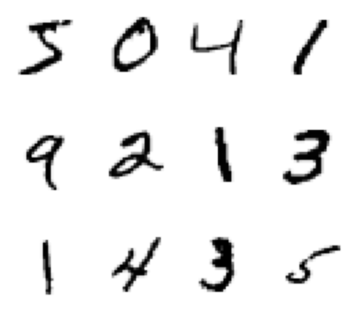

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [0]:
X_valid.shape

(10000, 28, 28)

In [9]:
y_valid.shape

(10000,)

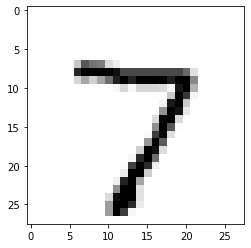

In [10]:
plt.imshow(X_valid[0], cmap="Greys")

In [11]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_valid[0]

7

#### Preprocess data

In [0]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [0]:
X_train /= 255
X_valid /= 255

In [15]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [17]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [0]:
model = keras.models.Sequential([
    
    keras.layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
    
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
64*784

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

In [0]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

#### Train!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0932 - accuracy: 0.0992 - val_loss: 0.0916 - val_accuracy: 0.1009
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.0993 - val_loss: 0.0906 - val_accuracy: 0.1005
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy: 0.1181
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.1253 - val_loss: 0.0895 - val_accuracy: 0.1499
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.1651 - val_loss: 0.0892 - val_accuracy: 0.1931
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.2072 - val_loss: 0.0888 - val_accuracy: 0.2276
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.2410 - val_loss: 0.0885 - val_accuracy: 0.2572

#### Performing Inference

In [0]:
valid_0 = X_valid[0].reshape(1, 784)

In [25]:
model.predict(valid_0)

array([[3.7457894e-03, 1.3807167e-03, 1.5720883e-03, 5.4541784e-03,
        4.0015448e-03, 5.8186613e-03, 5.3481519e-04, 9.4548440e-01,
        1.8646236e-03, 3.0143155e-02]], dtype=float32)

In [0]:
import numpy as np

In [30]:
np.argmax(model.predict(valid_0), axis=-1)

array([7])